# Lecture: Introduction to Python for Data Science

**Target Audience:** Students who already have a solid grasp of Python basics (Variables, Functions, Loops, Lists/Dictionaries).

**Objective:** Shift mindset from "Pure Python Programming" (Loop-based) to "Data Science Thinking" (Vectorized & DataFrame-based operations).

**Core Content:**
1.  **NumPy:** Understanding high-performance numerical computing and the concept of **Vectorization**.
2.  **Pandas:** Mastering **Data Wrangling**, specifically DataFrame manipulation, GroupBy, and Aggregation.
3.  **Matplotlib & Seaborn:** The art of **Data Visualization** to uncover hidden patterns.
4.  **Scikit-learn:** Implementing the standard **Machine Learning Workflow** (Preprocess -> Train -> Evaluate).

---

## Section 0: Environment Setup
We start by importing the standard libraries using their community-accepted aliases. This is the first step in almost every Data Science project.

In [1]:
#!pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuration for cleaner output
%matplotlib inline
sns.set_theme(style="whitegrid", palette="muted")

print("All libraries loaded successfully!")

All libraries loaded successfully!


## Section 1: NumPy - The Power of Vectorization

### Why not just use Python Lists?
While Python lists are flexible (can hold mixed data types), they are slow for mathematical operations because Python has to check the type of every element during iteration.

**NumPy (Numerical Python)** solves this by introducing the `ndarray` (n-dimensional array):
1.  **Homogeneous Data:** All elements are of the same type (e.g., all integers or all floats).
2.  **Contiguous Memory:** Stored in a continuous block of memory, allowing the CPU to process data much faster.
3.  **Vectorization:** Apply operations to the entire array at once without explicit loops.

In [3]:
# 1.1. Comparing List vs NumPy Array
py_list = [1, 2, 3, 4, 5]
np_arr = np.array(py_list)

print(f"Type of List: {type(py_list)}")
print(f"Type of Array: {type(np_arr)}") # numpy.ndarray
print(f"Data Type inside Array: {np_arr.dtype}") # e.g., int64

Type of List: <class 'list'>
Type of Array: <class 'numpy.ndarray'>
Data Type inside Array: int64


In [4]:
# 1.2. Vectorization vs. Loops (Critical Concept)
# Task: Multiply every element by 2

# -- Pure Python Approach (Loop-based) --
# Inefficient for millions of rows because of type-checking overhead per iteration.
double_list = [x * 2 for x in py_list]

# -- NumPy Approach (Broadcasting) --
# The operation is applied to the whole block of memory simultaneously (C-optimized).
double_arr = np_arr * 2

print("Python List Result:", double_list)
print("NumPy Array Result:", double_arr)

Python List Result: [2, 4, 6, 8, 10]
NumPy Array Result: [ 2  4  6  8 10]


In [5]:
# 1.3. Statistics & Boolean Indexing
# NumPy allows conditional selection without writing 'if' statements inside loops.

print("Mean value:", np.mean(np_arr))

# Filtering: Select elements greater than 3
# Step 1: np_arr > 3 returns a boolean mask [False, False, False, True, True]
# Step 2: Passing that mask to the array selects only True values
filter_arr = np_arr[np_arr > 3]
print("Elements > 3:", filter_arr)

Mean value: 3.0
Elements > 3: [4 5]


## Section 2: Pandas - Data Wrangling & Analysis

Pandas is built on top of NumPy but adds **Labels** (Indices and Column Names), making it intuitive for tabular data.

**Key Structures:**
* **Series:** A single column (1D array with labels).
* **DataFrame:** A table (Collection of Series sharing the same index).

In [6]:
# 2.1. Creating a Simulated Dataset (Real Estate Data)
# Imagine this data came from an Excel or CSV file
data = {
    'Area_sqm': [50, 60, 75, 80, 100, 120, 150, 40, 200, 90, 55, 300],
    'Bedrooms': [1, 2, 2, 3, 3, 4, 4, 1, 5, 3, 2, 6],
    'District': ['D1', 'D2', 'D1', 'D3', 'D2', 'D3', 'D2', 'D1', 'D2', 'D3', 'D1', 'D2'],
    'Type': ['Apartment', 'Apartment', 'Townhouse', 'Townhouse', 'Apartment', 'Villa', 'Villa', 'Apartment', 'Villa', 'Townhouse', 'Apartment', 'Penthouse'],
    'Price_Billion': [3.5, 4.2, 5.0, 6.1, 7.5, 8.2, 12.0, 2.8, 15.5, 6.8, 3.8, 25.0]
}

df = pd.DataFrame(data)

# Inspect the first few rows to understand structure
df.head()

,Area_sqm,Bedrooms,District,Type,Price_Billion
0,50,1,D1,Apartment,3.5
1,60,2,D2,Apartment,4.2
2,75,2,D1,Townhouse,5.0
3,80,3,D3,Townhouse,6.1
4,100,3,D2,Apartment,7.5


In [7]:
# 2.2. Basic EDA (Exploratory Data Analysis)
# .info() is crucial. It tells you:
# 1. How many rows (entries) vs columns.
# 2. Data types (int, float, object/string).
# 3. Missing values (Non-Null count).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area_sqm       12 non-null     int64  
 1   Bedrooms       12 non-null     int64  
 2   District       12 non-null     object 
 3   Type           12 non-null     object 
 4   Price_Billion  12 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 612.0+ bytes


In [8]:
# 2.3. Querying & Filtering
# Think of this as SQL: SELECT * FROM df WHERE District='D2' AND Price > 7

condition = (df['District'] == 'D2') & (df['Price_Billion'] > 7)
luxury_d2 = df[condition]

print("Luxury properties in District 2:")
display(luxury_d2)

Luxury properties in District 2:


,Area_sqm,Bedrooms,District,Type,Price_Billion
4,100,3,D2,Apartment,7.5
6,150,4,D2,Villa,12.0
8,200,5,D2,Villa,15.5
11,300,6,D2,Penthouse,25.0


In [9]:
# 2.4. Aggregation & GroupBy (The Powerhouse of Pandas)
# Concept: Split (divide into groups) -> Apply (calculate mean/sum) -> Combine (merge results)

# Task: Calculate the average price per District
avg_price_by_district = df.groupby('District')['Price_Billion'].mean().sort_values()

print("Average Price by District:")
print(avg_price_by_district)

Average Price by District:
District
D1     3.775000
D3     7.033333
D2    12.840000
Name: Price_Billion, dtype: float64


## Section 3: Data Visualization

We use **Seaborn** (a high-level interface for Matplotlib) because:
1.  It handles Pandas DataFrames natively.
2.  It requires less code for complex plots.
3.  It has better default aesthetics.

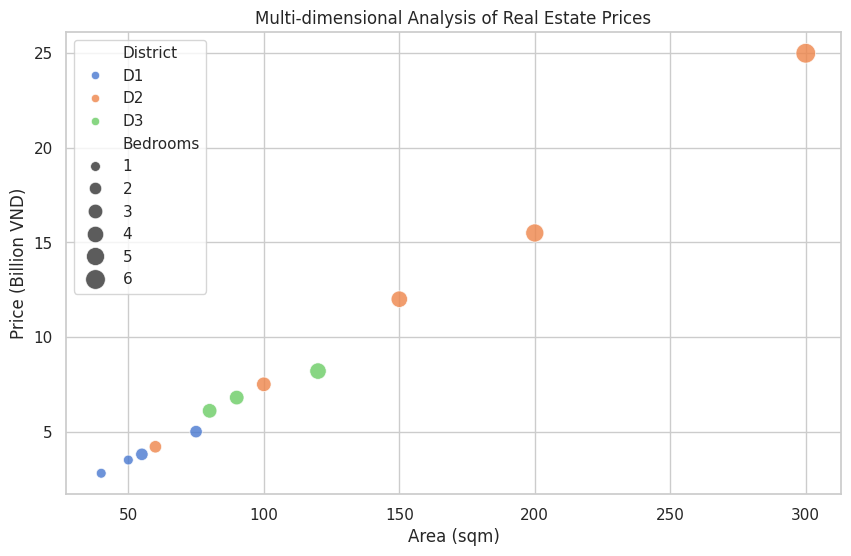

In [10]:
# 3.1. Multi-dimensional Analysis (Scatter Plot)
# We can visualize up to 4 dimensions on a 2D plane: X, Y, Color (Hue), Size.

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Area_sqm',
    y='Price_Billion',
    hue='District',      # Color represents District
    size='Bedrooms',     # Size represents number of Bedrooms
    sizes=(50, 200),
    alpha=0.8
)

plt.title('Multi-dimensional Analysis of Real Estate Prices')
plt.xlabel("Area (sqm)")
plt.ylabel("Price (Billion VND)")
plt.show()

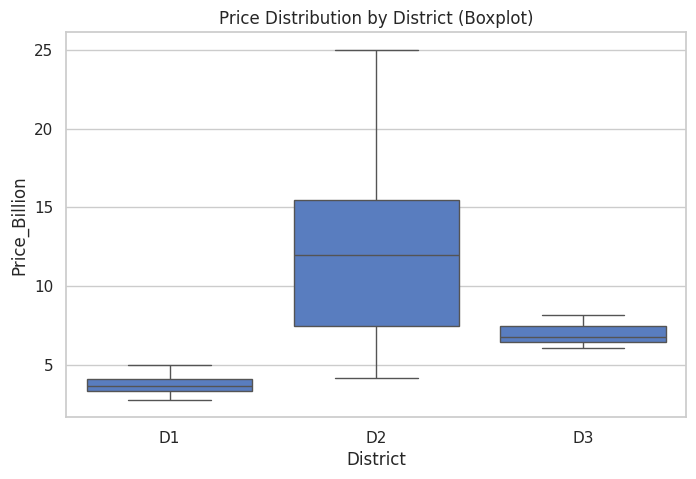

In [11]:
# 3.2. Distribution & Outlier Detection (Boxplot)
# Boxplots show the Median, Quartiles (25%, 75%), and Outliers (dots outside whiskers).
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='District', y='Price_Billion')
plt.title('Price Distribution by District (Boxplot)')
plt.show()

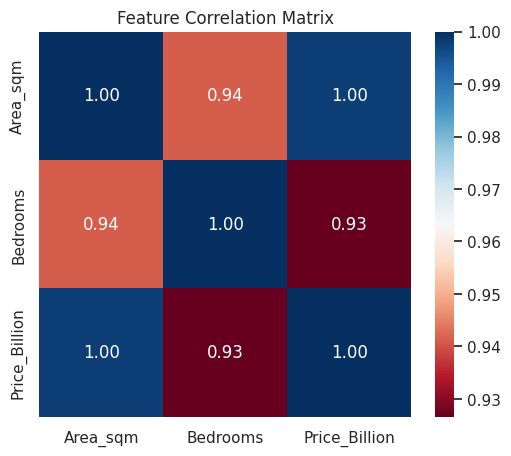

In [12]:
# 3.3. Correlation Matrix (Heatmap)
# Essential for Feature Selection: Which features relate strongly to the Target (Price)?
# Values close to 1.0 indicate strong positive correlation.

plt.figure(figsize=(6, 5))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

## Section 4: Scikit-Learn - The Machine Learning Workflow

Scikit-learn provides a consistent Object-Oriented API for almost all algorithms. The workflow always follows these steps:

1.  **Prepare Data (X, y):** Separate features and target.
2.  **Split Data:** Divide into Training Set (to learn) and Test Set (to validate).
3.  **Instantiate Model:** Choose the algorithm (e.g., Linear Regression).
4.  **Fit:** Train the model on the Training Set.
5.  **Predict & Evaluate:** Test performance on the Test Set.

In [13]:
# 4.1. Feature Selection & Train-Test Split
# Why Split? To prevent Overfitting. We want the model to generalize to new, unseen data.

X = df[['Area_sqm', 'Bedrooms']] # Features Matrix (2D)
y = df['Price_Billion']          # Target Vector (1D)

# 80% for Training, 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 9
Testing samples: 3


In [14]:
# 4.2. Instantiate & Train (Fit)
model = LinearRegression()

# The model learns the relationship: Price = w1*Area + w2*Bedrooms + Intercept
model.fit(X_train, y_train)

# Inspecting learned parameters
print(f"Model Intercept (Baseline Price): {model.intercept_:.2f}")
print(f"Coefficients (Weights for Area, Bedrooms): {model.coef_}")

Model Intercept (Baseline Price): -0.51
Coefficients (Weights for Area, Bedrooms): [ 0.0957056  -0.55790754]


R2 Score (Accuracy): 0.9679


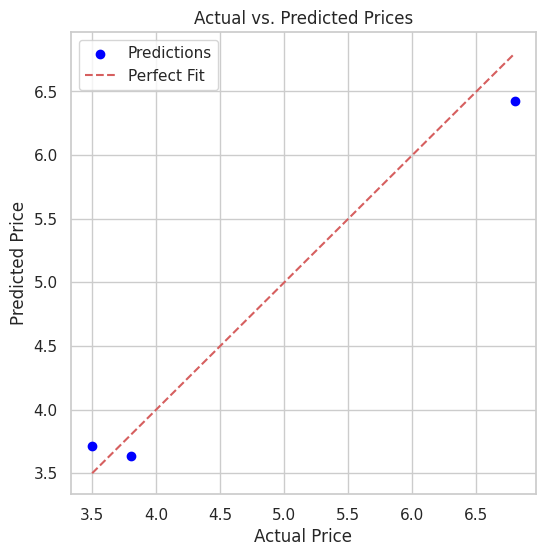

In [15]:
# 4.3. Predict & Evaluate
# We use the trained model to predict prices for the Test set
y_pred = model.predict(X_test)

# Evaluation Metric: R2 Score (Coefficient of Determination)
# 1.0 = Perfect prediction, 0.0 = Model is no better than guessing the mean.
score = r2_score(y_test, y_pred)
print(f"R2 Score (Accuracy): {score:.4f}")

# Visualizing Predictions vs Reality
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

## Conclusion & Next Steps

You have successfully built an end-to-end Data Science pipeline!

**Advanced Challenges:**
1.  **Preprocessing:** The 'District' column is text. Machines only understand numbers. Research **One-Hot Encoding** (`pd.get_dummies()`) to include 'District' in your model.
2.  **Model Selection:** Try `RandomForestRegressor` from `sklearn.ensemble`. It handles non-linear relationships better than Linear Regression.